# Noise spectrum density estimation and Wiener filtering

**Team member**:  

            BEHIDJ Ramzi
            Ousmane CISSE M2 Track AI

In [1]:
!wget http://hebergement.universite-paris-saclay.fr/mkowalski/AI/data/barbara.jpg
!wget http://hebergement.universite-paris-saclay.fr/mkowalski/AI/data/noise1.wav
!wget http://hebergement.universite-paris-saclay.fr/mkowalski/AI/data/noise2.wav
!wget http://hebergement.universite-paris-saclay.fr/mkowalski/AI/data/noise3.wav
!wget https://github.com/gpeyre/numerical-tours/raw/master/python/nt_toolbox.zip
!unzip nt_toolbox.zip

In [ ]:
!pip install spectrum

In [3]:
import cv2
from nt_toolbox.general import *
from nt_toolbox.signal import *
import numpy as np
import matplotlib.pylab as plt
from numpy.fft import fft2, ifft2
from scipy.signal import gaussian, convolve2d, convolve
from spectrum import *
from scipy.io import wavfile
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import find_peaks

# Noise

In signal processing, noise is a general term for unwanted (and, in general, unknown) modifications that a signal may su er during capture, storage, transmission, processing, or conversion. In the next sections, we will study the spectrum density with two di erent methods, using Periodogram and the Welsh method.
First, we will study the spectrum of one of the noises in order to visualize it. In fact, According to Fourier analysis, any physical signal can be decomposed into a number of discrete frequencies, or a spectrum of frequencies over a continuous range. The statistical average of a certain signal or sort of signal (including noise) as analyzed in terms of its frequency content, that's a spectrum.

## Periodogram

In signal processing, a periodogram is an estimate of the spectral density of a signal. The Periodogram class provides an interface to periodogram PSDs. The methode compute the PSD with the fast fourrier transform according to the following equation : 
\begin{equation}
\operatorname{PSD} (f)=\frac{\left|F F T\left(W_{t} \times X_{t}, f\right)\right|^{2}}{L} \times \frac{1}{\Delta f}
\end{equation}

 Giving three differents noises, we will perform a periodogram to each one and analyse the similarities and differencies.

---



In [4]:
fs, data1 = wavfile.read("noise1.wav")
data1=data1.astype(np.float)
fs2, data2 = wavfile.read("noise2.wav")
data2=data2.astype(np.float)
fs3, data3 = wavfile.read("noise3.wav")
data3=data3.astype(np.float)

In [5]:
p1 = Periodogram(data1)
p2 = Periodogram(data2)
p3 = Periodogram(data3)
data = [data1 , data2 , data3]

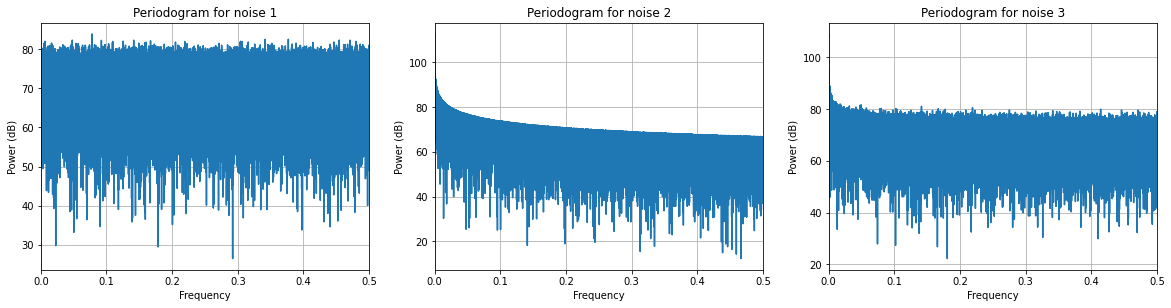

In [7]:
Periodogram = [p1 , p2 , p3 ]
label = ['Periodogram for noise 1','Periodogram for noise 2','Periodogram for noise 3']

fig = plt.figure(figsize=(20, 10))

for i in range(len(Periodogram)) :
    fig.add_subplot(2, 3, i+1)
    Periodogram[i].plot()
    plt.title(label[i])
plt.show()

as we could guess, we notice a spectrum with a very high variance. for example, the noise 1, the power(db) has variation between 30 db and 80 db which is very large and not very usefull to analyze. We can notice the same for the other noises. However, the periodogram give us a good view of the shape of the power density 

## WelshPeriodogram

The Welch's method computes an estimate of the power spectral density by dividing the data into overlapping segments, computing a modi ed periodogram for each segment and averaging the periodograms. In other words, the method is based on the concept of using periodogram spectrum estimates, which are the result of converting a signal from the time domain to the frequency domain. Due to the noise caused by imperfect and  nite data, the noise reduction from Welch's method is often desired. 
In fact, the method of averaged periodograms divides a long $x[n]$ sequence into multiple shorter, and possibly overlapping, subsequences. It computes a windowed periodogram of each one, and computes an array average, i.e. an array where each element is an average of the corresponding elements of all the periodograms. For stationary processes, this reduces the noise variance of each element by approximately a factor equal to the reciprocal of the
number of periodograms.

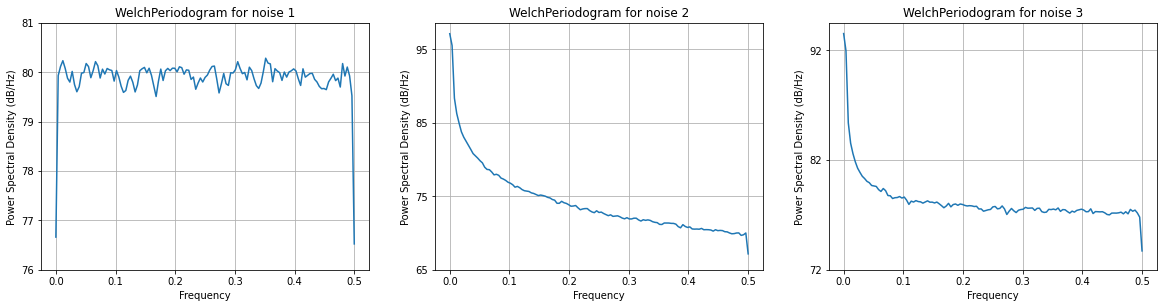

In [8]:
label = ['WelchPeriodogram for noise 1','WelchPeriodogram for noise 2','WelchPeriodogram for noise 3']
fig = plt.figure(figsize=(20, 10))

for i in range(3) :
    fig.add_subplot(2, 3, i+1)
    WelchPeriodogram(data[i])
    plt.title(label[i])
plt.show()

The welshPeriodogram give is very precise information about the PSD and more stationary process, since the variance is much harder to compute. This reduces the noise variance of each element by approximately a factor equal to the reciprocal of the number of periodograms.
We notice a shape similar to the periodograms which we performed above but the values are more understandable due to the process explained above.

## Noises Color Detection

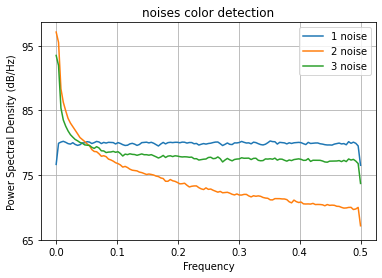

In [9]:
for i in range(3) :
    WelchPeriodogram(data[i],label="{} noise".format(i+1))
    plt.title('noises color detection')
plt.legend()
plt.show()

The color of noise refers to the power spectrum of a noise signal (a signal produced by a stochastic process). For noise 1, we notice that the signal has a  flat frequency spectrum, as shown in the figures ( blue curve). In other words, the signal has equal power in any band of a given bandwidth (power spectral density) when the bandwidth is measured in Hz. Therefore, and based on the results of both our methods, we conclue that our signal is white noise, which spectrum density is shown at below. For the noises 2 and 3 we notice that the power density is decreasing for both, that phenomenon matches with two noises color : red and pink. However, we notice that the noise 2 ( represented by the orange curve) is decreasing much faster than the other noise. According to the definition, red noise decrease 6.02 db per octave for 3.01 db for the pink noise. We can deduce from that the noise 2 is red and 3 is pink. 

# Image

On this section the traditional and well-known image of Barbara will be used to apply an additivive white gaussian noise and further apply the Weiner filter to remove the added noise of the image.

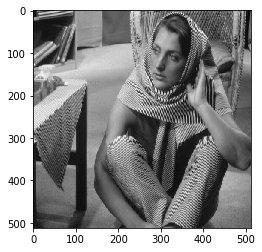

In [10]:
name = 'barbara.jpg'
f0 = cv2.imread(name,0)
plt.imshow(f0,interpolation='nearest', cmap = 'gray')

The definition of white noise is based on the fact that it has equal intensity on different frequencies and thus a constant power spectral density. And it's used here a gaussian noise because it will follow a gaussian distribution.
First of all, we are gonna use the SNR in db which is definded as : 
\begin{equation}
\mathrm{SNR}_{\mathrm{dB}}=10 \log _{10}\left(\frac{P_{\text {signal }}}{P_{\text {noise }}}\right)
\end{equation}

the second step will be to get the sigma from a given SNR, indeed we want to add noise to barbara image given several SNR ( 0 , 5 , 10 , 15 , 20 ). To create the noisy image of barbara with given SNR, we have to compute previously the needed sigma which is computed by the following formula : 
$$
S N R_{d B}=10 \times \log _{10}\left(P_{i m g} / \sigma^{2}\right)
$$
From which we can simply to with $x=10 \times \log _{10}\left(P_{i m g}\right)$ and $y=S N R_{d B} / 10$
$$
\sigma=10^{(x-y) / 2}
$$

## Noising the image

In [11]:
def get_snr_db(img, noise):
    img_power = np.var(img)
    noise_power = np.var(noise)
    return 10*np.log10(img_power / noise_power)

In [12]:
def sigma_snr(snr_db, img):
    x = np.log10(np.var(img))
    y = snr_db / 10
    return 10 ** ((x-y)/2)

In [13]:
def gaussian_noise(img,sigma):
    return sigma*np.random.standard_normal(f0.shape)

In [14]:
SNR = [0, 5 , 10 , 15 , 20 ]
sigma_vals = [sigma_snr(db, f0) for db in SNR]
print(sigma_vals)

[47.82856153705181, 26.895976676693877, 15.124719166660755, 8.50525461931188, 4.782856153705182]


In [15]:
noisy_imgs = []
for sigma in sigma_vals:
    noise = gaussian_noise(f0,sigma)
    noisy_img = f0 + noise
    noisy_imgs.append(noisy_img)

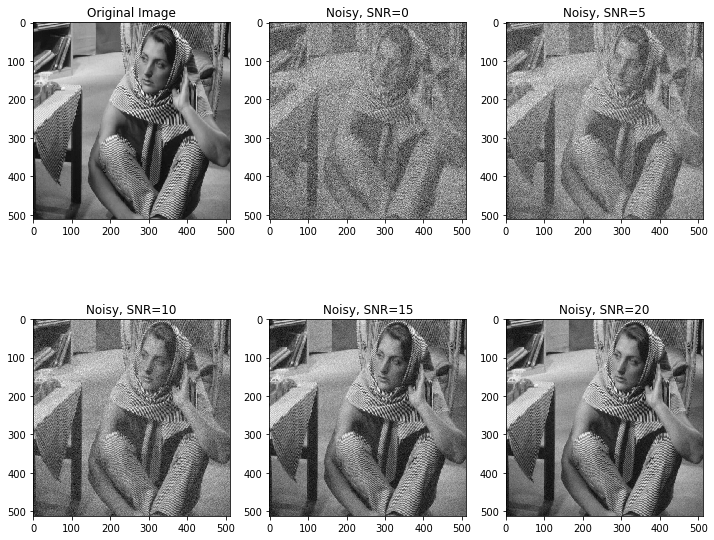

In [16]:
display = [f0, noisy_imgs[0], noisy_imgs[1], noisy_imgs[2],noisy_imgs[3],noisy_imgs[4]]
label = ['Original Image', 'Noisy, SNR=0', 'Noisy, SNR=5', 'Noisy, SNR=10' , 'Noisy, SNR=15', 'Noisy, SNR=20']

fig = plt.figure(figsize=(12, 10))

for i in range(len(display)):
    fig.add_subplot(2, 3, i+1)
    plt.imshow(display[i],interpolation='nearest', cmap = 'gray')
    plt.title(label[i])

plt.show()

As we can see, we succeeded to add noise to barbara image given several SNR. We notice that the more noisy image matches with the SNR = 0 which make sense given the definition of the SNR. More the noise is high more the $\left(\frac{P_{\text {signal }}}{P_{\text {noise }}}\right)$ tend to 0.

## Denoising the image

In this part, we will take the noisy images that we created and then apply the wiener filter to retrieve the original image of barbara without the noise. The main idea of the filter is to compute the spectral density of the noise in order to create a convolution kernel to remove it, only the center of this kernel contains interesting information and thus it's cropped.
Given the following formula from the numerical tours :

A translation invariant linear denoising is necessarely a convolution with a kernel $h$
$$
x=x_{0} \star h
$$
where the periodic convolution between two 2-D arrays is defined as
$$
(a \star b)_{i}=\sum_{j} a(j) b(i-j)
$$
It can be computed over the Fourier domain as
$$
\forall \omega, \quad x(\omega)=\hat{x_{0}}(\omega) \hat{h(\omega)}
$$

We will implement a denoising function which will return the denoised image with the kernel associated to the filter.

In [17]:
def denoise(img,sigma) :
  N = img.shape[0] * img.shape[1]
  n = int(np.sqrt(N))
  P = 1/N * ( abs(np.fft.fft2(img))**2 )
  h_w = np.absolute(np.fft.ifft2(P / (P + sigma**2)))
  u = fftshift(h_w)
  start = int(n/2 - 10)
  end = int(n/2 + 10)
  denoise = convolve2d(img, u[start:end, start:end], boundary='symm', mode='same')
  return denoise, u[start:end,start:end]

In [18]:
kernels = []
filtered_imgs = []
for i in range(len(noisy_imgs)) :
  filtered_img, kernel = denoise(noisy_imgs[i],sigma_vals[i])
  filtered_imgs.append(filtered_img)
  kernels.append(kernel)

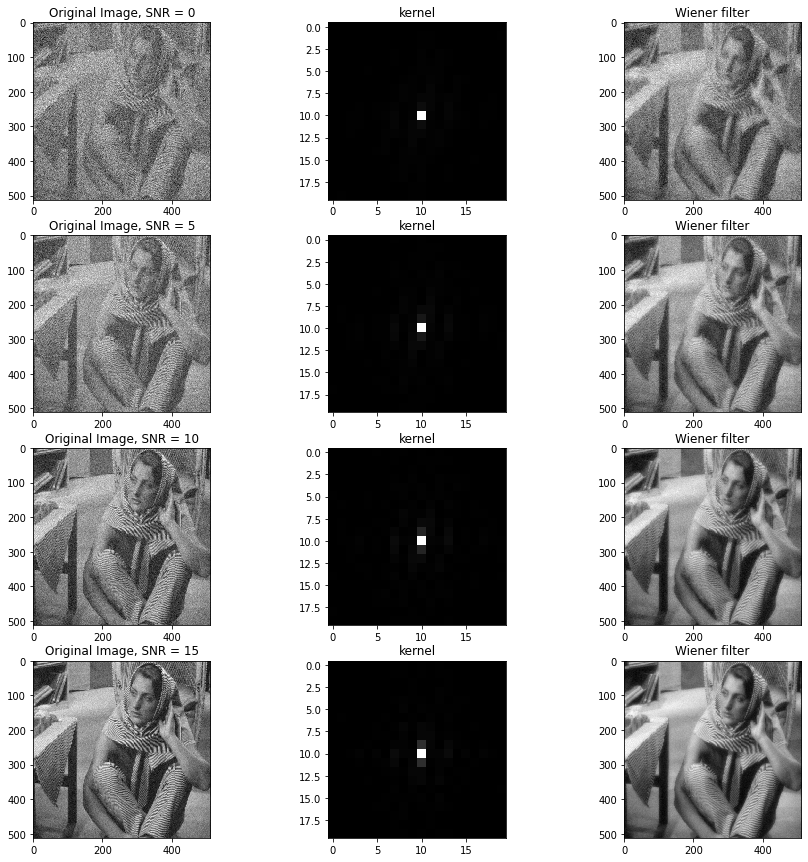

In [19]:
display = [noisy_imgs[0], 
           kernels[0],filtered_imgs[0],noisy_imgs[1], kernels[1],filtered_imgs[1], noisy_imgs[2], kernels[2],filtered_imgs[2],noisy_imgs[3], kernels[3],filtered_imgs[3]]
label = ['Original Image, SNR = 0', 'kernel','Wiener filter','Original Image, SNR = 5', 'kernel','Wiener filter','Original Image, SNR = 10','kernel','Wiener filter','Original Image, SNR = 15','kernel','Wiener filter']

fig = plt.figure(figsize=(15, 15))

for i in range(len(display)):
    fig.add_subplot(4, 3, i+1)
    plt.imshow(display[i],interpolation='nearest', cmap = 'gray')
    plt.title(label[i])

plt.show()

We can conclude that the wiener filter work very well for a gaussian noise removing, the barbara image is restored pretty well given any SNR.

## The noised musics

Simulate a noisy version of the music using the three noises using a global factor of $0.1$ for each noise.

In [ ]:
!wget http://hebergement.universite-paris-saclay.fr/mkowalski/AI/data/music.wav

In [21]:
from IPython.display import Audio

In [22]:
audio_file_1 = "music.wav"
freq, music = wavfile.read(audio_file_1)

In [23]:
Audio(music, rate= freq)

In [24]:
music_noised_1 = music + 0.1 * data1
music_noised_2 = music + 0.1 * data2
music_noised_3 = music + 0.1 * data3

In [25]:
Audio(music_noised_1, rate= freq)

In [26]:
Audio(music_noised_2, rate= freq)

In [27]:
Audio(music_noised_3, rate= freq)

Denoise the sound using the Oracle Wiener filter.

In [28]:
sigma_1= np.std(data1)
sigma_2= np.std(data2)
sigma_3= np.std(data3)

In [29]:
def denoise(son,sig) :
    N = son.size
    n = int(np.sqrt(N))
    P = 1/N * ( abs(np.fft.fft(son))**2 )
    h_w = np.absolute(np.fft.ifft(P / (P + sig**2)))
    u = fftshift(h_w)
    start = int(n/2 - 10)
    end = int(n/2 + 10)
    denoise = convolve(son, u[start:end], mode='same')
    return denoise, u[start:end]

In [30]:
music_noised_1_denoised,h_1 = denoise(music_noised_1, sigma_1)
music_noised_2_denoised,h_2 = denoise(music_noised_2, sigma_2)
music_noised_3_denoised,h_3 = denoise(music_noised_3, sigma_3)

In [31]:
Audio(music_noised_1_denoised, rate= freq)

In [32]:
Audio(music_noised_2_denoised, rate= freq)

In [33]:
Audio(music_noised_3_denoised, rate= freq)